In [3]:
import cv2
import os

In [4]:
dir_anno = "PascalVOC/Annotations"
img_dir  = "PascalVOC/JPEGImages"
#saveファイルを作成
save_path = "PascalVOC/SaveImages"
os.makedirs(save_path, exist_ok=True)

In [59]:
ls $dir_anno | wc -l; ls $dir_anno | head -10

      96
picture000.xml
picture001.xml
picture002.xml
picture003.xml
picture004.xml
picture005.xml
picture006.xml
picture007.xml
picture008.xml
picture009.xml


In [60]:
ls $img_dir | wc -l;ls $img_dir | head -10

      96
picture000.jpg
picture001.jpg
picture002.jpg
picture003.jpg
picture004.jpg
picture005.jpg
picture006.jpg
picture007.jpg
picture008.jpg
picture009.jpg


In [61]:
import os 
import numpy as np
import xml.etree.ElementTree as ET
from collections import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd 

def extract_single_xml_file(tree):
    Nobj = 0
    row  = OrderedDict()
    for elems in tree.iter():

        if elems.tag == "size":
            for elem in elems:
                row[elem.tag] = int(elem.text)
        if elems.tag == "object":
            for elem in elems:
                if elem.tag == "name":
                    row["bbx_{}_{}".format(Nobj,elem.tag)] = str(elem.text)              
                if elem.tag == "bndbox":
                    for k in elem:
                        row["bbx_{}_{}".format(Nobj,k.tag)] = float(k.text)
                    Nobj += 1
    row["Nobj"] = Nobj
    return(row)

df_anno = []
for fnm in os.listdir(dir_anno):  
    if not fnm.startswith('.'): ## do not include hidden folders/files
        tree = ET.parse(os.path.join(dir_anno,fnm))
        row = extract_single_xml_file(tree)
        row["fileID"] = fnm.split(".")[0]
        df_anno.append(row)
df_anno = pd.DataFrame(df_anno)

maxNobj = np.max(df_anno["Nobj"])


print("columns in df_anno\n-----------------")
for icol, colnm in enumerate(df_anno.columns):
    print("{:3.0f}: {}".format(icol,colnm))
print("-"*30)
print("df_anno.shape={}=(N frames, N columns)".format(df_anno.shape))
df_anno.head()

columns in df_anno
-----------------
  0: width
  1: height
  2: depth
  3: bbx_0_name
  4: bbx_0_xmin
  5: bbx_0_ymin
  6: bbx_0_xmax
  7: bbx_0_ymax
  8: bbx_1_name
  9: bbx_1_xmin
 10: bbx_1_ymin
 11: bbx_1_xmax
 12: bbx_1_ymax
 13: bbx_2_name
 14: bbx_2_xmin
 15: bbx_2_ymin
 16: bbx_2_xmax
 17: bbx_2_ymax
 18: bbx_3_name
 19: bbx_3_xmin
 20: bbx_3_ymin
 21: bbx_3_xmax
 22: bbx_3_ymax
 23: Nobj
 24: fileID
 25: bbx_4_name
 26: bbx_4_xmin
 27: bbx_4_ymin
 28: bbx_4_xmax
 29: bbx_4_ymax
------------------------------
df_anno.shape=(96, 30)=(N frames, N columns)


,width,height,depth,bbx_0_name,bbx_0_xmin,bbx_0_ymin,bbx_0_xmax,bbx_0_ymax,bbx_1_name,bbx_1_xmin,...,bbx_3_ymin,bbx_3_xmax,bbx_3_ymax,Nobj,fileID,bbx_4_name,bbx_4_xmin,bbx_4_ymin,bbx_4_xmax,bbx_4_ymax
0,500,500,3,female,249.066416,281.407587,287.968941,318.951520,male,268.800619,...,195.883156,382.817275,402.24108,4,picture039,NaN,NaN,NaN,NaN,NaN
1,500,500,3,other,167.806388,294.530295,195.854504,324.794182,other,181.540342,...,NaN,NaN,NaN,3,picture005,NaN,NaN,NaN,NaN,NaN
2,500,500,3,other,169.652067,279.967814,200.142783,315.938264,other,187.320924,...,NaN,NaN,NaN,3,picture011,NaN,NaN,NaN,NaN,NaN
3,500,500,3,other,167.677453,284.198789,207.585193,314.469839,other,177.696172,...,NaN,NaN,NaN,3,picture010,NaN,NaN,NaN,NaN,NaN
4,500,500,3,other,168.033217,291.390491,197.425600,326.933546,other,174.816626,...,NaN,NaN,NaN,3,picture004,NaN,NaN,NaN,NaN,NaN


Counter({'other': 134, 'big egg': 96, 'female': 61, 'male': 61})


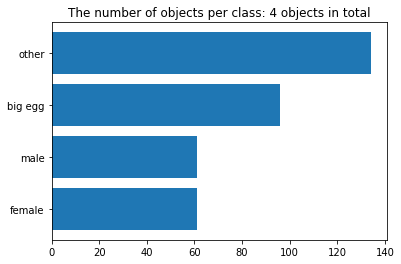

In [62]:
from collections import Counter
class_obj = []
for ibbx in range(maxNobj):
    class_obj.extend(df_anno["bbx_{}_name".format(ibbx)].values)
class_obj = np.array(class_obj)

count             = Counter(class_obj[class_obj != 'nan'])
print(count)
class_nm          = list(count.keys())
class_count       = list(count.values())
asort_class_count = np.argsort(class_count)

class_nm          = np.array(class_nm)[asort_class_count]
class_count       = np.array(class_count)[asort_class_count]

xs = range(len(class_count))
plt.barh(xs,class_count)
plt.yticks(xs,class_nm)
plt.title("The number of objects per class: {} objects in total".format(len(count)))
plt.show()

In [1]:
import imageio
def plt_rectangle(plt,label,x1,y1,x2,y2):
    
    linewidth = 3
    color = "yellow"

    plt.text(x1,y1,label,fontsize=20,backgroundcolor="magenta")
    plt.plot([x1,x1],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x2,x2],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y1,y1], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y2,y2], linewidth=linewidth,color=color)
 
ind_random = list (range(0,df_anno.shape[0]))
for irow in ind_random:
    row  = df_anno.iloc[irow,:]
    path = os.path.join(img_dir, row["fileID"] + ".jpg")
    save_path=os.path.join(save_dir, row["fileID"] + ".jpg")
    # read in image
    img  = imageio.imread(path)

    plt.figure(figsize=(12,12))
    plt.imshow(img) # plot image
    plt.title("Nobj={}, height={}, width={}".format(row["Nobj"],row["height"],row["width"]))
    # for each object in the image, plot the bounding box
    for iplot in range(row["Nobj"]):
        plt_rectangle(plt,
                      label = row["bbx_{}_name".format(iplot)],
                      x1=row["bbx_{}_xmin".format(iplot)],
                      y1=row["bbx_{}_ymin".format(iplot)],
                      x2=row["bbx_{}_xmax".format(iplot)],
                      y2=row["bbx_{}_ymax".format(iplot)])
    #plt.show() ## show the plot
    plt.savefig(save_path)

NameError: name 'df_anno' is not defined